### Klaviyo Exercise
In order to remove bias, we have anonymized this step of the interview process. 

 * **Please do not deanonymize yourself in this jupyter notebook**.
 * **Please write your code and solutions in this notebook and return it to us when you are finished**.

### Interpreting the Orders Dataset

For questions 1, 2, and 3, you will work with sales data from a marketplace with several stores. The attached CSV, `screening_exercise_orders_v202102.csv`, lists the customer, date, and dollar value of orders placed in 2017. The gender of each customer is also provided. Please do not excluded $0 orders. 

### Exercise 1

Assemble a dataframe with one row per customer and the following columns:
* customer_id 
* gender
* most_recent_order_date 
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [17]:
pip install pandas

     |████████████████████████████████| 10.7 MB 2.2 MB/s eta 0:00:01    |██                              | 655 kB 1.3 MB/s eta 0:00:08     |███████                         | 2.4 MB 1.3 MB/s eta 0:00:07
     |████████████████████████████████| 16.1 MB 910 kB/s eta 0:00:01    |██████████████████              | 9.0 MB 1.1 MB/s eta 0:00:07     |████████████████████████████████| 16.1 MB 910 kB/s eta 0:00:01
     |████████████████████████████████| 510 kB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
#View Data at a glance
import pandas as pd
pd.read_csv(r"screening_exercise_orders_v202102.csv")

,customer_id,gender,date,value
0,1000,0,2017-01-01 00:11:31,198.50
1,1001,0,2017-01-01 00:29:56,338.00
2,1002,1,2017-01-01 01:30:31,733.00
3,1003,1,2017-01-01 01:34:22,772.00
4,1004,0,2017-01-01 03:11:54,508.00
...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44
13467,9811,1,2017-12-31 22:24:06,148.60
13468,9812,0,2017-12-31 23:01:10,153.00
13469,9813,0,2017-12-31 23:11:02,534.00


In [134]:
#Testing first
data = pd.read_csv(r"screening_exercise_orders_v202102.csv")
exercise1_res = data.groupby(['customer_id', 'gender']).agg(latest_date = ('date', 'max'), order_cnt = ('date', 'count')).reset_index().head(10)
print(exercise1_res)

   customer_id  gender          latest_date  order_cnt
0         1000       0  2017-01-01 00:11:31          1
1         1001       0  2017-01-01 00:29:56          1
2         1002       1  2017-02-19 21:35:31          3
3         1003       1  2017-04-26 02:37:20          4
4         1004       0  2017-01-01 03:11:54          1
5         1005       1  2017-12-16 01:39:27          2
6         1006       1  2017-05-09 15:27:20          3
7         1007       0  2017-01-01 15:59:50          1
8         1008       0  2017-12-17 05:47:48          3
9         1009       1  2017-01-01 19:27:17          1


In [126]:
#Name modify
order_count = data['customer_id'].value_counts()
order_count_df = order_count.to_frame().reset_index()
order_count_df.columns = ['customer_id','order_count']

In [127]:
customer_MRorder = data.groupby(['customer_id','gender'], sort=False)['date'].max()
customer_MRorder_df = customer_MRorder.to_frame().reset_index()
customer_MRorder_df.columns = ['customer_id','gender','most_recent_order_date']

In [129]:
#unless specified, the values will be sorted in an ascending order by default
customer_dataframe = customer_MRorder_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))
result = customer_dataframe.head(10)
print("First 10 rows of the DataFrame:")

#Ans
print(result)

First 10 rows of the DataFrame:
             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
1005              1    2017-12-16 01:39:27            2
1006              1    2017-05-09 15:27:20            3
1007              0    2017-01-01 15:59:50            1
1008              0    2017-12-17 05:47:48            3
1009              1    2017-01-01 19:27:17            1


### Exercise 2
Plot the count of orders per week (for all stores together). Do not use plotly, as plotly graphs in Jupyter Notebooks don't render correctly on different machines.

In [98]:
import csv
with open(r"screening_exercise_orders_v202102.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    column = [row['date'] for row in reader]
print (column)

['2017-01-01 00:11:31', '2017-01-01 00:29:56', '2017-01-01 01:30:31', '2017-01-01 01:34:22', '2017-01-01 03:11:54', '2017-01-01 10:08:05', '2017-01-01 15:42:57', '2017-01-01 15:59:50', '2017-01-01 18:01:04', '2017-01-01 19:27:17', '2017-01-01 19:41:40', '2017-01-01 22:04:54', '2017-01-01 22:08:16', '2017-01-01 23:51:58', '2017-01-02 00:28:42', '2017-01-02 01:20:53', '2017-01-02 01:24:13', '2017-01-02 01:42:44', '2017-01-02 01:52:59', '2017-01-02 02:08:52', '2017-01-02 02:17:03', '2017-01-02 02:45:09', '2017-01-02 03:18:18', '2017-01-02 03:36:59', '2017-01-02 04:07:51', '2017-01-02 05:19:48', '2017-01-02 05:19:49', '2017-01-02 14:52:06', '2017-01-02 15:49:44', '2017-01-02 16:41:13', '2017-01-02 17:01:25', '2017-01-02 17:37:26', '2017-01-02 17:57:04', '2017-01-02 18:23:06', '2017-01-02 18:54:17', '2017-01-02 19:33:40', '2017-01-02 20:01:31', '2017-01-02 20:36:49', '2017-01-02 21:06:35', '2017-01-02 21:29:41', '2017-01-02 22:49:09', '2017-01-02 22:54:55', '2017-01-02 23:25:26', '2017-01-0

In [99]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install matplotlib

     |████████████████████████████████| 8.5 MB 3.1 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 2.2 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 378 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install seaborn

     |████████████████████████████████| 285 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 5.7 MB/s eta 0:00:01     |████████████████████▎           | 19.6 MB 7.4 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [130]:
#Testing for calculating the week number
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(r"screening_exercise_orders_v202102.csv")

df['weekday'] = pd.to_datetime(df['date']).dt.week

import datetime 
dates = df['date'].values.tolist()
dtlist = [datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in dates]
week = [x.isocalendar()[1] for x in dtlist]

<ipython-input-130-8b05c405becb>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekday'] = pd.to_datetime(df['date']).dt.week


In [131]:
### generate nth week data based on date 
exercise2_data = data.copy() 
exercise2_data['date'] = exercise2_data['date'].astype('datetime64[ns]')
exercise2_data['nth_week'] = exercise2_data['date'].dt.week

<ipython-input-131-96f1c94a9bf0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  exercise2_data['nth_week'] = exercise2_data['date'].dt.week


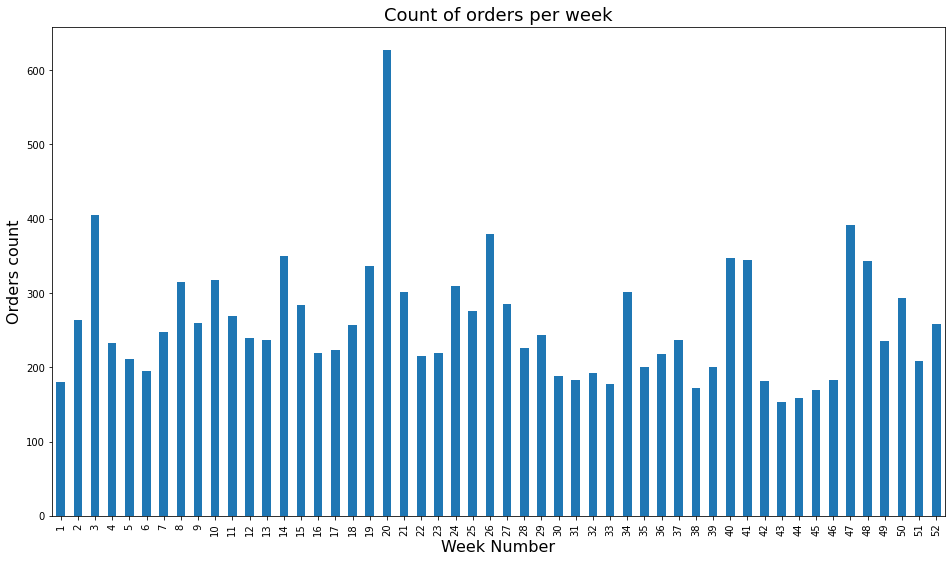

In [150]:
%matplotlib inline 
ordercnt_weekly = exercise2_data.groupby('nth_week')['date'].count()
plt.figure(figsize=(16, 9)) 
ordercnt_weekly.plot(kind='bar')

plt.title('Count of orders per week',fontsize=18)
plt.ylabel('Orders count',fontsize=16)
plt.xlabel('Week Number',fontsize=16)

plt.show() 

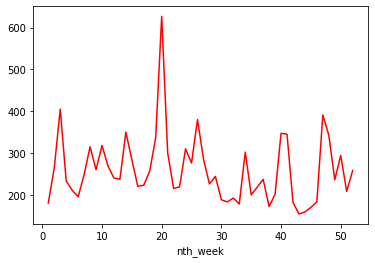

In [152]:
ordercnt_weekly.plot(kind='line',color='red')
plt.show() 

### Exercise 3

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? 

**Justify your choice of method and state any assumptions you make. Make sure you are clear about why your method is suitable for this dataset, in particular.**.

In [153]:
## mean
gender_stats = df.groupby('gender')['value'].mean().reset_index()

# stats
gender_stats = df.groupby('gender')['value'].describe().reset_index()

print(gender_stats)


   gender   count        mean         std  min     25%    50%    75%     max
0       0  6759.0  363.890006  396.533215  0.0  161.93  258.0  434.0  8046.3
1       1  6712.0  350.708361  377.504737  0.0  161.20  258.0  416.0  6877.0


In [155]:
#Ans:
exercise3_data = data.copy()
gender0 = exercise3_data[exercise3_data['gender'] == 0]['value'].values
gender1 = exercise3_data[exercise3_data['gender'] == 1]['value'].values 

In [165]:
# student t test 
from scipy.stats import ttest_ind
stat, p = ttest_ind(gender0, gender1) 
print('Stats=%.3f, p=%.3f' % (stat, p))

alpha = .05
print('Same distributions (fail to reject H0)') if p > alpha else print('Different distributions (reject H0)')
##     res: 
##     means of gender 0/1 are different, with a significance of at least 5%.

Stats=1.976, p=0.048
Different distributions (reject H0)


### Interpreting the Product Dataset
For this question you will work with the data in the CSV `screening_exercise_products_v202102.csv`. This dataset shows the number of times a particular item was sold. It contains the following columns: 
* number_of_orders - the number of orders containing the product
* store_id - the ID of the store selling the product
* product_id - the ID of the product itself
* is_red - whether the product is red.

### Exercise 4

Suppose some of our customers came to us with the belief that the color red generates more sales than other colors.  Based on this dataset, would you suggest that companies color more of their products red? Why or why not, and what other factors could be important to determine this? 

**Please justify your answer and state any assumptions you make.**

In [166]:
data = pd.read_csv('screening_exercise_products_v202102.csv')

In [172]:
data

,store_id,product_id,is_red,number_of_orders
0,0,0,True,15
1,0,100,True,37
2,0,200,True,36
3,0,300,False,11
4,0,400,False,10
...,...,...,...,...
2995,29,29950,False,16
2996,29,29960,True,14
2997,29,29970,False,26
2998,29,29980,True,10


In [167]:
isred = data.groupby('is_red')['number_of_orders'].describe().reset_index()

In [168]:
isred_sum = data.groupby('is_red')['number_of_orders'].sum().reset_index()

In [169]:
isred

,is_red,count,mean,std,min,25%,50%,75%,max
0,False,1456.0,23.351648,9.000800,2.0,17.0,22.0,29.0,59.0
1,True,1544.0,26.153497,10.111902,5.0,19.0,25.0,32.0,64.0


In [170]:
isred_sum

,is_red,number_of_orders
0,False,34000
1,True,40381


In [171]:
data.corr()

,store_id,product_id,is_red,number_of_orders
store_id,1.000000,0.999921,-0.007870,-0.005074
product_id,0.999921,1.000000,-0.007961,-0.005286
is_red,-0.007870,-0.007961,1.000000,0.144552
number_of_orders,-0.005074,-0.005286,0.144552,1.000000


I think I would suggest the company to put more red color products on sale since I may find out that the number of "red orders" was more than the number of all other orders from the dataset I had. Red is more effective for impulse purchases in my data anslysis. There were different types of data in form like store would be the categorical data which might need encoding, for me, I would consider correlation as well to make the prediction.

It is a open question. In order to get better result, we can complete the whole machine learning process in seven steps for the project including gathering data, preparing the data, model selection, training, evaluation, parameter/hyperparameter tuning, and prediction. Also, we can even do A/B testing to compare red with other optional color.

### Exercise 5

Describe one of your favorite tools or techniques and give a small example of how it has helped you solve a problem. Limit your answer to one short paragraph, and please be specific. 

I think Airflow would be a good tool to solve big data problems with python API. We may use plugins to support various jobs like ETL, also including data processing jobs: Hive, Pig (although you can also submit them via shell commands), and general process management triggered by the file db Entry/S3, or wait for a Web endpoint The expected output, but it also provides a really nice UI that allows you to check the DAG (workflow dependency) through code/graphics and monitor the real-time execution of the job. Airflow Github repository has a wide range of connectors to external systems, I had used it to store the data on a Hadoop cluster and triggered a AWS SageMaker training job at the same time conveniently.